# Online Shoppers Purchasing Intention

In [ ]:
# Mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Importing and Installing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ps

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector

!pip install mlxtend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Reading dataset
dataset = pd.read_csv('/content/online_shoppers_intention.csv')

In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Exploratory Data Analysis (EDA)

In [ ]:
# Describing the whole dataset
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Checking if any data is null and summing it
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# Getting dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


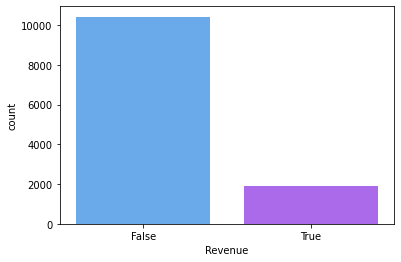

In [ ]:
sns.countplot(dataset['Revenue'], palette = 'cool')

Highly Imbalanced Dataset since more than 10,000 people did not buy and only around 1900 people did.

In [ ]:
dataset['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


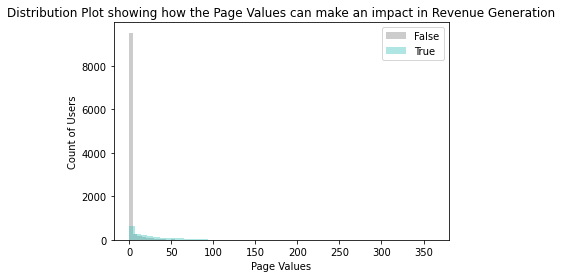

In [ ]:
revenue_0 = dataset.loc[dataset['Revenue'] == False]
revenue_1 = dataset.loc[dataset['Revenue'] == True]

sns.distplot(revenue_0[['PageValues']], kde = False,label = 'False', color = 'gray')
sns.distplot(revenue_1[['PageValues']], kde = False, label = 'True', color = '#39c0ba')
plt.xlabel('Page Values')
plt.ylabel('Count of Users')
plt.title('Distribution Plot showing how the Page Values can make an impact in Revenue Generation')
plt.legend()
plt.show()


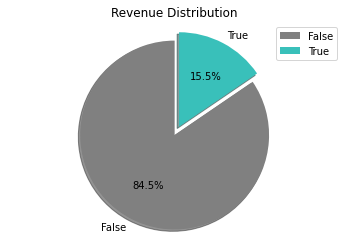

In [ ]:
labels = ['False', 'True']
explode = (0, 0.1)
color = ['gray', '#39c0ba']
fig1, ax1 = plt.subplots()
ax1.pie(dataset['Revenue'].value_counts(),labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color)
ax1.axis('equal')

plt.title('Revenue Distribution')
plt.legend()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


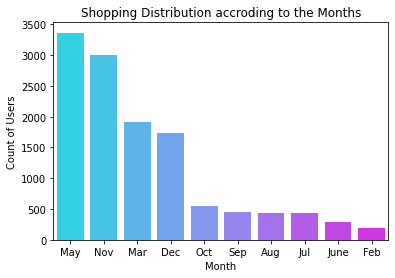

In [ ]:
sns.countplot(dataset['Month'], palette='cool', order = dataset['Month'].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Count of Users')
plt.title('Shopping Distribution accroding to the Months')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


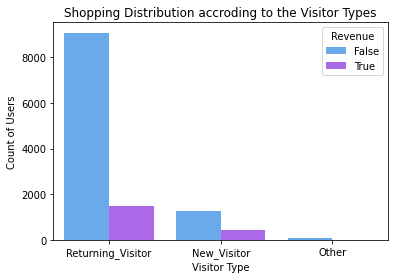

In [ ]:
sns.countplot(dataset['VisitorType'], palette = 'cool', hue = dataset['Revenue'])
plt.xlabel('Visitor Type')
plt.ylabel('Count of Users')
plt.title('Shopping Distribution accroding to the Visitor Types')
plt.show()

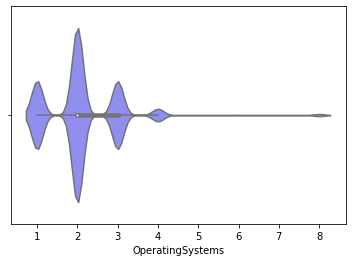

In [ ]:
sns.violinplot(data=dataset, x= dataset['OperatingSystems'], palette ='cool')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


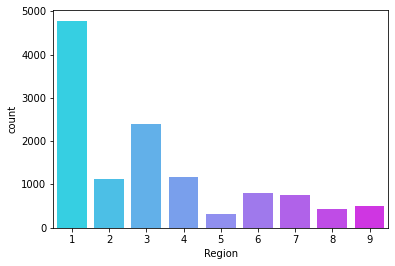

In [ ]:
sns.countplot(dataset['Region'], palette ='cool')

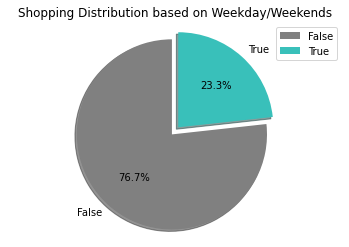

In [ ]:
labels = ['False', 'True']
explode = (0, 0.1) 
color = ['gray', '#39c0ba']
fig1, ax1 = plt.subplots()
ax1.pie(dataset['Weekend'].value_counts(),labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color)
ax1.axis('equal')

plt.title('Shopping Distribution based on Weekday/Weekends')
plt.legend()
plt.show()

In [ ]:
# Calculating Average amount of minutes spent per page type
print("Average amount of minutes spent per page type :")
print("Administrative Duration : ",dataset['Administrative_Duration'].mean()/60," mins")
print("Informational Duration : ",dataset['Informational_Duration'].mean()/60," mins")
print("ProductRelated Duration : ",dataset['ProductRelated_Duration'].mean()/60," mins")

Average amount of minutes spent per page type :
Administrative Duration :  1.3469768423222654  mins
Informational Duration :  0.5745399654620507  mins
ProductRelated Duration :  19.912436999480448  mins


In [ ]:
# Calculating Average amount of Pages visited per page type 
print("Average amount of Pages visited per page type :")
print("Administrative : ",dataset['Administrative'].mean()," Pages")
print("Informational : ",dataset['Informational'].mean()," Pages")
print("ProductRelated : ",dataset['ProductRelated'].mean()," Pages")

Average amount of Pages visited per page type :
Administrative :  2.3151662611516626  Pages
Informational :  0.5035685320356853  Pages
ProductRelated :  31.731467964314678  Pages


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


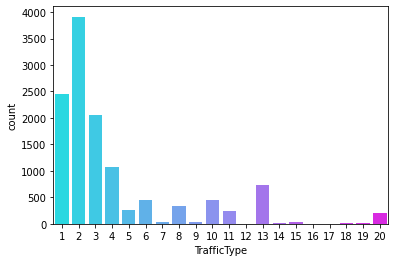

In [ ]:
sns.countplot(dataset['TrafficType'], palette ='cool')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


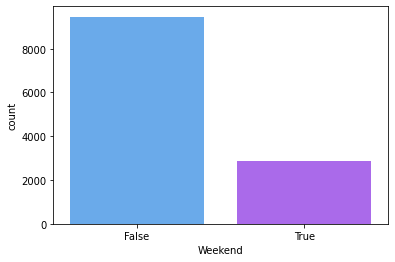

In [ ]:
sns.countplot(dataset['Weekend'], palette = 'cool')

In [ ]:
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


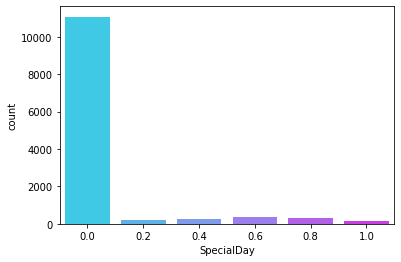

In [ ]:
sns.countplot(dataset['SpecialDay'], palette = 'cool')

In [ ]:
dataset['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


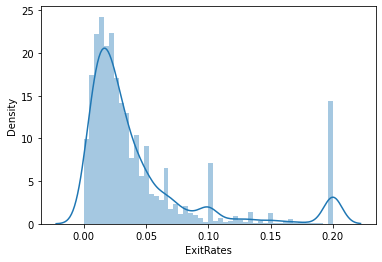

In [ ]:
sns.distplot(dataset['ExitRates'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


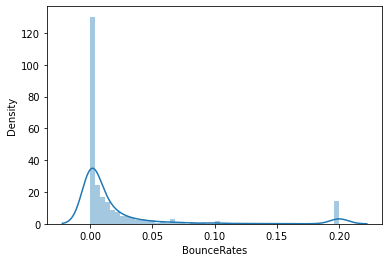

In [ ]:
sns.distplot(dataset['BounceRates'])

<ipython-input-30-70ee98a4a952>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_plot, dtype=np.bool))


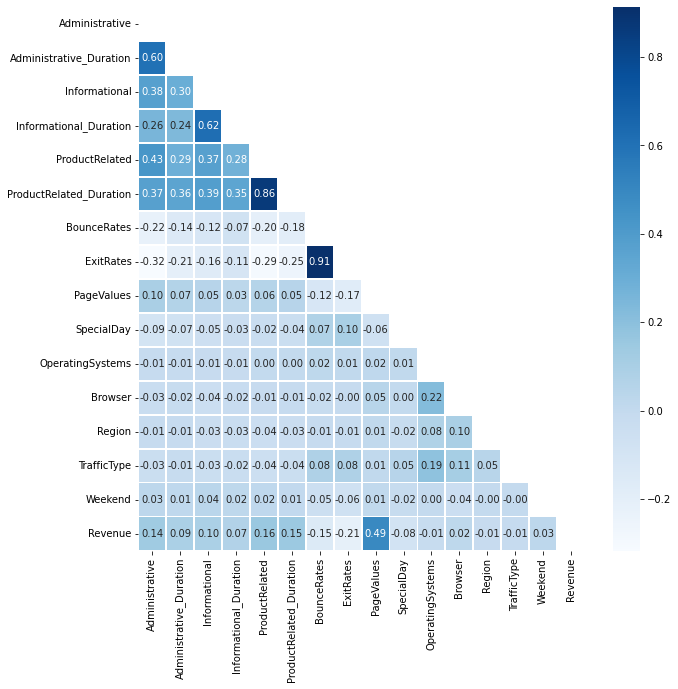

In [ ]:
plt.figure(figsize=(10,10))
correlation_plot=dataset.corr()
mask = np.triu(np.ones_like(correlation_plot, dtype=np.bool))
sns.heatmap(correlation_plot,mask=mask,annot=True,fmt='0.2f',linewidth=0.8,cmap="Blues")

# Data Processing

In [ ]:
# Converting boolean to integer
dataset['Weekend']=dataset['Weekend'].astype('int')
dataset['Revenue']=dataset['Revenue'].astype('int')

In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
dataset['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
# Applying LabelEncoder
le=LabelEncoder()
le.fit(dataset.VisitorType)
dataset.VisitorType=le.transform(dataset.VisitorType)

In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,1,0


In [ ]:
dataset['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [ ]:
# Replacing Month values
dataset['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)


In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
dataset['Month']

0         2
1         2
2         2
3         2
4         2
         ..
12325    12
12326    11
12327    11
12328    11
12329    11
Name: Month, Length: 12330, dtype: int64

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 17)
(2466, 17)
(9864,)
(2466,)


In [ ]:
X_test[1]
type(X_test[1])

numpy.ndarray

# Data Modeling

In [ ]:
# Neural Network

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(12, input_shape=(17,), activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
# Compiling the keras model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fitting the keras model on the dataset
model_nn.fit(X_train, y_train, epochs=150, batch_size=10)
# Getting results
_, accuracy = model_nn.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
987/987 [==============================] - 6s 3ms/step - loss: 2.2276 - accuracy: 0.8450
Epoch 2/150
987/987 [==============================] - 3s 3ms/step - loss: 0.4770 - accuracy: 0.8582
Epoch 3/150
987/987 [==============================] - 3s 3ms/step - loss: 0.3765 - accuracy: 0.8703
Epoch 4/150
987/987 [==============================] - 5s 5ms/step - loss: 0.3567 - accuracy: 0.8732
Epoch 5/150
987/987 [==============================] - 4s 4ms/step - loss: 0.3672 - accuracy: 0.8637
Epoch 6/150
987/987 [==============================] - 3s 3ms/step - loss: 0.3643 - accuracy: 0.8572
Epoch 7/150
987/987 [==============================] - 3s 3ms/step - loss: 0.3598 - accuracy: 0.8711
Epoch 8/150
987/987 [==============================] - 3s 3ms/step - loss: 0.3516 - accuracy: 0.8734
Epoch 9/150
987/987 [==============================] - 4s 4ms/step - loss: 0.3492 - accuracy: 0.8760
Epoch 10/150
987/987 [==============================] - 4s 4ms/step - loss: 0.3265 - accura

In [ ]:
X_test.shape

(2466, 17)

In [ ]:
# Predictions with the model
predictions_nn = (model_nn.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, predictions_nn))
print(confusion_matrix(y_test, predictions_nn))

78/78 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.73      0.46      0.56       411

    accuracy                           0.88      2466
   macro avg       0.82      0.71      0.75      2466
weighted avg       0.87      0.88      0.87      2466

[[1986   69]
 [ 223  188]]


### Decision Tree Classification

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [ ]:
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 17)
(2466, 17)
(9864,)
(2466,)


In [ ]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
model_dt1 = DecisionTreeClassifier()
model_dt1.fit(X_train, y_train)
predictions_dt1 = model_dt1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_dt1))
print(confusion_matrix(y_test, predictions_dt1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2055
           1       0.58      0.58      0.58       411

    accuracy                           0.86      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.86      0.86      0.86      2466

[[1880  175]
 [ 174  237]]


### Random Forest Classification

In [ ]:
model_rf1 = RandomForestClassifier()
model_rf1.fit(X_train, y_train)
predictions_rf1 = model_rf1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_rf1))
print(confusion_matrix(y_test, predictions_rf1))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.72      0.53      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466

[[1971   84]
 [ 194  217]]


### Support Vector Machine Classification


In [ ]:
model_svc1 = svm.SVC()
model_svc1.fit(X_train, y_train) 
predictions_svc1 = model_svc1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_svc1))
print(confusion_matrix(y_test, predictions_svc1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2055
           1       0.86      0.01      0.03       411

    accuracy                           0.84      2466
   macro avg       0.85      0.51      0.47      2466
weighted avg       0.84      0.84      0.76      2466

[[2054    1]
 [ 405    6]]


### Naive Bayes

In [ ]:
model_nb1 = GaussianNB()
model_nb1.fit(X_train, y_train)
predictions_nb1 = model_nb1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_nb1))
print(confusion_matrix(y_test, predictions_nb1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.53      0.53      0.53       411

    accuracy                           0.84      2466
   macro avg       0.72      0.72      0.72      2466
weighted avg       0.84      0.84      0.84      2466

[[1862  193]
 [ 192  219]]


### Logistic Regression

In [ ]:
model_lr1 = LogisticRegression(random_state = 42)
model_lr1.fit(X_train, y_train)
predictions_lr1 = model_lr1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, predictions_nb1))
print(confusion_matrix(y_test, predictions_nb1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.53      0.53      0.53       411

    accuracy                           0.84      2466
   macro avg       0.72      0.72      0.72      2466
weighted avg       0.84      0.84      0.84      2466

[[1862  193]
 [ 192  219]]


# Feature Selection Process : Backward Elimination

### Decision Tree Classification

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# forward = False means Backward Elimination is used.
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features= 'best',
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.2s finished

[2022-12-20 22:27:20] Features: 16/1 -- score: 0.8642544019722646[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.9s finished

[2022-12-20 22:27:23] Features: 15/1 -- score: 0.8680050355252295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.6s finished

[2022-12-20 22:27:26] Features: 14/1 -- score: 0.8676001270704201[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
forward_feature_selection.k_feature_idx_

(8, 10)

In [ ]:
list(forward_feature_selection.k_feature_idx_)

[8, 10]

In [ ]:
forward_feature_selection.k_score_

0.8775348030048657

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8651799290420679, 0.8423720223010643, 0.862...",0.856549,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.010464,0.008141,0.004071
16,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8656867714140902, 0.8621388748099341, 0.863...",0.864254,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.004202,0.003269,0.001635
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.8737962493664471, 0.8575772934617334, 0.873...",0.868005,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",0.007677,0.005973,0.002986
14,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16)","[0.8692346680182463, 0.8641662442980234, 0.863...",0.8676,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16)",0.00552,0.004295,0.002147
13,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16)","[0.8737962493664471, 0.8677141409021795, 0.866...",0.869323,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16)",0.005082,0.003954,0.001977
12,"(1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16)","[0.870248352762291, 0.8616320324379118, 0.8692...",0.867296,"(1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16)",0.007612,0.005922,0.002961
11,"(1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15)","[0.8727825646224024, 0.8677141409021795, 0.865...",0.870135,"(1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15)",0.006506,0.005062,0.002531
10,"(1, 3, 4, 6, 7, 8, 9, 10, 12, 15)","[0.870248352762291, 0.8651799290420679, 0.8672...",0.868513,"(1, 3, 4, 6, 7, 8, 9, 10, 12, 15)",0.005734,0.004461,0.002231
9,"(1, 3, 4, 6, 7, 8, 9, 10, 15)","[0.8717688798783578, 0.8682209832742017, 0.867...",0.868614,"(1, 3, 4, 6, 7, 8, 9, 10, 15)",0.008066,0.006276,0.003138
8,"(1, 3, 4, 6, 7, 8, 10, 15)","[0.8778509883426254, 0.8580841358337558, 0.869...",0.868208,"(1, 3, 4, 6, 7, 8, 10, 15)",0.009136,0.007108,0.003554


In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_dt2 = DecisionTreeClassifier()
model_dt2.fit(X_train, y_train)
predictions_dt2 = model_dt2.predict(X_test)
print(classification_report(y_test, predictions_dt2))
print(confusion_matrix(y_test, predictions_dt2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2055
           1       0.65      0.51      0.57       411

    accuracy                           0.87      2466
   macro avg       0.78      0.73      0.75      2466
weighted avg       0.86      0.87      0.87      2466

[[1941  114]
 [ 202  209]]


In [ ]:
# Decision Tree Adaboost
model_dt3 = AdaBoostClassifier(random_state = 42)
model_dt3.fit(X_train, y_train)
predictions_dt3 = model_dt3.predict(X_test)
print(classification_report(y_test, predictions_dt3))
print(confusion_matrix(y_test, predictions_dt3))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2055
           1       0.66      0.55      0.60       411

    accuracy                           0.88      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.87      0.88      0.87      2466

[[1939  116]
 [ 184  227]]


### Random Forest Classification

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= 'best',
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)

print(forward_feature_selection.k_feature_idx_)
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.5min finished

[2022-12-20 22:29:11] Features: 16/1 -- score: 0.9047039187242788[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.3min finished

[2022-12-20 22:30:32] Features: 15/1 -- score: 0.9056162863978106[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished

[2022-12-20 22:31:46] Features: 14/1 -- score: 0.9047040215320623[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
0.9056162863978106
                                          feature_idx  \
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
15  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
14    (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15)   
13        (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15)   
12           (0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 15)   
11              (0, 2, 5, 6, 7, 8, 9, 10, 11, 12, 15)   
10                  (0, 2, 5, 6, 7, 8, 9, 10, 11, 15)   
9                       (0, 2, 5, 6, 7, 8, 9, 10, 15)   
8                          (0, 2, 5, 6, 7, 8, 10, 15)   
7                              (0, 2, 5, 6, 7, 8, 10)   
6                                 (0, 5, 6, 7, 8, 10)   
5                                    (0, 5, 7, 8, 10)   
4                                       (5, 7, 8, 10)   
3                                           (5, 7, 8)   
2                

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s finished

[2022-12-20 22:38:11] Features: 1/1 -- score: 0.8739860325345511

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_rf2 = RandomForestClassifier()
model_rf2.fit(X_train, y_train)
predictions_rf2 = model_rf2.predict(X_test)
print(classification_report(y_test, predictions_rf2))
print(confusion_matrix(y_test, predictions_rf2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

[[1977   78]
 [ 193  218]]


In [ ]:
# Random Forest Adaboost
model_rf3 = AdaBoostClassifier(random_state = 42, base_estimator = RandomForestClassifier())
model_rf3.fit(X_train, y_train)
predictions_rf3 = model_rf3.predict(X_test)
print(classification_report(y_test, predictions_rf3))
print(confusion_matrix(y_test, predictions_rf3))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.84      0.75      0.78      2466
weighted avg       0.89      0.89      0.89      2466

[[1987   68]
 [ 195  216]]


### Naive Bayes Classifier

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(GaussianNB(),
                                                     k_features= 'best',
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)

print(forward_feature_selection.k_feature_idx_)
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2022-12-20 22:38:14] Features: 16/1 -- score: 0.8560418078131858[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2022-12-20 22:38:15] Features: 15/1 -- score: 0.8633408520092238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished

[2022-12-20 22:38:15] Features: 14/1 -- score: 0.8685117750894685[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

(6, 8, 15)
0.8959857158865784
                                          feature_idx  \
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
15  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
14  (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
13     (3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
12        (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
11            (5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16)   
10               (5, 6, 7, 8, 10, 11, 13, 14, 15, 16)   
9                    (5, 6, 7, 8, 10, 11, 13, 15, 16)   
8                        (5, 6, 7, 8, 10, 11, 15, 16)   
7                            (5, 6, 7, 8, 11, 15, 16)   
6                                (5, 6, 7, 8, 11, 15)   
5                                    (5, 6, 7, 8, 15)   
4                                       (5, 6, 8, 15)   
3                                          (6, 8, 15)   
2                                              (6, 8)   
1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2022-12-20 22:38:17] Features: 4/1 -- score: 0.8886863632671902[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-12-20 22:38:17] Features: 3/1 -- score: 0.8959857158865784[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2022-12-20 22:38:17] Features: 2/1 -- score: 0.8923362451924511[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-12-20 22:38:17] Features: 1/1 -- sc

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_nb2 = GaussianNB()
model_nb2.fit(X_train, y_train)
predictions_nb2 = model_nb2.predict(X_test)
print(classification_report(y_test, predictions_nb2))
print(confusion_matrix(y_test, predictions_nb2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.72      0.44      0.55       411

    accuracy                           0.88      2466
   macro avg       0.81      0.70      0.74      2466
weighted avg       0.87      0.88      0.87      2466

[[1984   71]
 [ 230  181]]


In [ ]:
# Adaboost
model_nb3 = AdaBoostClassifier(random_state = 42, base_estimator = GaussianNB())
model_nb3.fit(X_train, y_train)
predictions_nb3 = model_nb3.predict(X_test)
print(classification_report(y_test, predictions_nb3))
print(confusion_matrix(y_test, predictions_nb3))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466

[[2055    0]
 [ 411    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM Classifier

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(svm.SVC(),
                                                     k_features= 'best',
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)

print(forward_feature_selection.k_feature_idx_)
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  2.2min finished

[2022-12-20 22:40:39] Features: 16/1 -- score: 0.8881794180873845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.9min finished

[2022-12-20 22:42:30] Features: 15/1 -- score: 0.8912211919740021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.6min finished

[2022-12-20 22:44:06] Features: 14/1 -- score: 0.8947696540209666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

(0, 2, 8, 10, 11, 15)
0.897608382535425
                                          feature_idx  \
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
15  (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
14  (0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
13     (0, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
12         (0, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16)   
11             (0, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16)   
10                 (0, 2, 6, 7, 8, 9, 10, 11, 14, 15)   
9                     (0, 2, 6, 7, 8, 10, 11, 14, 15)   
8                        (0, 2, 6, 8, 10, 11, 14, 15)   
7                           (0, 2, 8, 10, 11, 14, 15)   
6                               (0, 2, 8, 10, 11, 15)   
5                                   (0, 2, 8, 10, 15)   
4                                       (0, 2, 8, 15)   
3                                          (0, 8, 15)   
2                                              (

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s finished

[2022-12-20 22:54:38] Features: 1/1 -- score: 0.8923365022119094

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_svc2 = svm.SVC()
model_svc2.fit(X_train, y_train) 
predictions_svc2 = model_svc2.predict(X_test)
print(classification_report(y_test, predictions_svc2))
print(confusion_matrix(y_test, predictions_svc2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.71      0.53      0.61       411

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466

[[1966   89]
 [ 193  218]]


### Logistic Regression

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(LogisticRegression(),
                                                     k_features= 'best',
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)

print(forward_feature_selection.k_feature_idx_)
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0, 2, 3, 4, 8, 9, 10, 11, 14, 15)
0.8879766811385756
                                          feature_idx  \
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...   
15  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...   
14   (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16)   
13       (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16)   
12          (0, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16)   
11              (0, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15)   
10                 (0, 2, 3, 4, 8, 9, 10, 11, 14, 15)   
9                     (0, 2, 3, 4, 8, 10, 11, 14, 15)   
8                        (2, 3, 4, 8, 10, 11, 14, 15)   
7                            (2, 3, 4, 8, 11, 14, 15)   
6                               (2, 3, 8, 11, 14, 15)   
5                                   (2, 3, 8, 14, 15)   
4                                      (2, 8, 14, 15)   
3                                         (8, 14, 15)   
2                                 

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_lr2 = LogisticRegression(random_state = 42)
model_lr2.fit(X_train, y_train) 
predictions_lr2 = model_lr2.predict(X_test)
print(classification_report(y_test, predictions_lr2))
print(confusion_matrix(y_test, predictions_lr2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.73      0.33      0.46       411

    accuracy                           0.87      2466
   macro avg       0.81      0.65      0.69      2466
weighted avg       0.86      0.87      0.85      2466

[[2005   50]
 [ 274  137]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Adaboost
model_lr3 = AdaBoostClassifier(random_state = 42, base_estimator = LogisticRegression())
model_lr3.fit(X_train, y_train)
predictions_lr3 = model_lr3.predict(X_test)
print(classification_report(y_test, predictions_lr3))
print(confusion_matrix(y_test, predictions_lr3))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.81      0.20      0.32       411

    accuracy                           0.86      2466
   macro avg       0.83      0.60      0.62      2466
weighted avg       0.85      0.86      0.82      2466

[[2035   20]
 [ 328   83]]


# Feature Selection Process : Forward Selection

### Decision Tree Classifier

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# forward = True means Forward Selection is used.
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features= 'best',
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)
print(forward_feature_selection.k_feature_idx_)  
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)                                  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2022-12-20 22:58:46] Features: 1/17 -- score: 0.8739860325345511[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2022-12-20 22:58:46] Features: 2/17 -- score: 0.878751276101611[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished

[2022-12-20 22:58:47] Features: 3/17 -- score: 0.8801704347432736[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

(8, 10, 14, 15)
0.8840228480017766
                                          feature_idx  \
1                                                (8,)   
2                                             (8, 14)   
3                                         (8, 14, 15)   
4                                     (8, 10, 14, 15)   
5                                  (8, 9, 10, 14, 15)   
6                               (2, 8, 9, 10, 14, 15)   
7                           (2, 8, 9, 10, 12, 14, 15)   
8                       (2, 8, 9, 10, 12, 14, 15, 16)   
9                   (2, 8, 9, 10, 11, 12, 14, 15, 16)   
10               (2, 3, 8, 9, 10, 11, 12, 14, 15, 16)   
11            (0, 2, 3, 8, 9, 10, 11, 12, 14, 15, 16)   
12         (0, 2, 3, 4, 8, 9, 10, 11, 12, 14, 15, 16)   
13      (0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16)   
14   (0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16)   
15  (0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
16  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2022-12-20 22:58:54] Features: 16/17 -- score: 0.8623276813040961[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2022-12-20 22:58:54] Features: 17/17 -- score: 0.8570569318661978

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_dt4 = DecisionTreeClassifier()
model_dt4.fit(X_train, y_train) 
predictions_dt4 = model_dt4.predict(X_test)
print(classification_report(y_test, predictions_dt4))
print(confusion_matrix(y_test, predictions_dt4))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2055
           1       0.64      0.54      0.58       411

    accuracy                           0.87      2466
   macro avg       0.77      0.74      0.75      2466
weighted avg       0.86      0.87      0.87      2466

[[1931  124]
 [ 191  220]]


In [ ]:
# Adaboost
model_dt5 = AdaBoostClassifier(random_state = 42, base_estimator = DecisionTreeClassifier())
model_dt5.fit(X_train, y_train)
predictions_dt5 = model_dt5.predict(X_test)
print(classification_report(y_test, predictions_dt5))
print(confusion_matrix(y_test, predictions_dt5))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.67      0.54      0.60       411

    accuracy                           0.88      2466
   macro avg       0.79      0.74      0.76      2466
weighted avg       0.87      0.88      0.87      2466

[[1945  110]
 [ 188  223]]


### Random Forest Classifier

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= 'best',
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)
print(forward_feature_selection.k_feature_idx_)  
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T)   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   39.4s finished

[2022-12-20 22:59:34] Features: 1/17 -- score: 0.8738846640601465[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   40.7s finished

[2022-12-20 23:00:15] Features: 2/17 -- score: 0.8811845821223432[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   42.9s finished

[2022-12-20 23:00:58] Features: 3/17 -- score: 0.885848097387757[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16)
0.9071371219372276
                                          feature_idx  \
1                                                (8,)   
2                                              (0, 8)   
3                                          (0, 8, 10)   
4                                      (0, 8, 10, 14)   
5                                   (0, 6, 8, 10, 14)   
6                                (0, 5, 6, 8, 10, 14)   
7                             (0, 5, 6, 7, 8, 10, 14)   
8                          (0, 5, 6, 7, 8, 9, 10, 14)   
9                       (0, 4, 5, 6, 7, 8, 9, 10, 14)   
10                  (0, 4, 5, 6, 7, 8, 9, 10, 14, 16)   
11              (0, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16)   
12          (0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16)   
13       (0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16)   
14    (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16)   
15  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
16  (0, 1, 3, 4, 5, 6, 7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished

[2022-12-20 23:06:53] Features: 17/17 -- score: 0.902676806255648

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_rf4 = RandomForestClassifier()
model_rf4.fit(X_train, y_train) 
predictions_rf4 = model_rf4.predict(X_test)
print(classification_report(y_test, predictions_rf4))
print(confusion_matrix(y_test, predictions_rf4))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

[[1975   80]
 [ 191  220]]


In [ ]:
# Adaboost
model_rf5 = AdaBoostClassifier(random_state = 42, base_estimator = RandomForestClassifier())
model_rf5.fit(X_train, y_train)
predictions_rf5 = model_rf5.predict(X_test)
print(classification_report(y_test, predictions_rf5))
print(confusion_matrix(y_test, predictions_rf5))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.82      0.76      0.78      2466
weighted avg       0.88      0.89      0.89      2466

[[1973   82]
 [ 184  227]]


### Naive Bayes Classifier

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(GaussianNB(),
                                                     k_features= 'best',
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)
print(forward_feature_selection.k_feature_idx_)  
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2022-12-20 23:06:56] Features: 1/17 -- score: 0.8883825148634352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-12-20 23:06:56] Features: 2/17 -- score: 0.8923362451924511[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2022-12-20 23:06:56] Features: 3/17 -- score: 0.8959857158865784[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

(6, 8, 14, 15, 16)
0.8966951409957344
                                          feature_idx  \
1                                                (8,)   
2                                              (6, 8)   
3                                          (6, 8, 15)   
4                                      (6, 8, 15, 16)   
5                                  (6, 8, 14, 15, 16)   
6                              (6, 8, 13, 14, 15, 16)   
7                          (6, 8, 11, 13, 14, 15, 16)   
8                       (5, 6, 8, 11, 13, 14, 15, 16)   
9                    (5, 6, 7, 8, 11, 13, 14, 15, 16)   
10               (5, 6, 7, 8, 10, 11, 13, 14, 15, 16)   
11            (5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16)   
12        (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
13     (3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
14  (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
15  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
16  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-12-20 23:06:58] Features: 14/17 -- score: 0.8685117750894685[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2022-12-20 23:06:58] Features: 15/17 -- score: 0.8633408520092238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-12-20 23:06:59] Features: 16/17 -- score: 0.8560418078131858[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-12-20 23:06:59] Features: 17/

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_nb4 = GaussianNB()
model_nb4.fit(X_train, y_train) 
predictions_nb4 = model_nb4.predict(X_test)
print(classification_report(y_test, predictions_nb4))
print(confusion_matrix(y_test, predictions_nb4))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.72      0.44      0.54       411

    accuracy                           0.88      2466
   macro avg       0.81      0.70      0.74      2466
weighted avg       0.87      0.88      0.87      2466

[[1984   71]
 [ 231  180]]


In [ ]:
# Adaboost
model_nb5 = AdaBoostClassifier(random_state = 42, base_estimator = GaussianNB())
model_nb5.fit(X_train, y_train)
predictions_nb5 = model_nb5.predict(X_test)
print(classification_report(y_test, predictions_nb5))
print(confusion_matrix(y_test, predictions_nb5))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2055
           1       0.32      0.34      0.33       411

    accuracy                           0.77      2466
   macro avg       0.59      0.60      0.59      2466
weighted avg       0.77      0.77      0.77      2466

[[1753  302]
 [ 271  140]]


### SVM Classifier

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(svm.SVC(),
                                                     k_features= 'best',
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)
print(forward_feature_selection.k_feature_idx_)  
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.2min finished

[2022-12-20 23:08:09] Features: 1/17 -- score: 0.8923365022119094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.3min finished

[2022-12-20 23:09:25] Features: 2/17 -- score: 0.8965945435797054[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished

[2022-12-20 23:10:36] Features: 3/17 -- score: 0.89730422570832[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

(0, 2, 8, 10, 11, 15)
0.897608382535425
                                          feature_idx  \
1                                                (8,)   
2                                              (0, 8)   
3                                          (0, 8, 15)   
4                                      (0, 8, 11, 15)   
5                                  (0, 8, 10, 11, 15)   
6                               (0, 2, 8, 10, 11, 15)   
7                           (0, 2, 8, 10, 11, 14, 15)   
8                        (0, 2, 6, 8, 10, 11, 14, 15)   
9                     (0, 2, 6, 7, 8, 10, 11, 14, 15)   
10                 (0, 2, 6, 7, 8, 9, 10, 11, 14, 15)   
11             (0, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16)   
12         (0, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16)   
13     (0, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
14  (0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
15  (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
16  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished

[2022-12-20 23:20:13] Features: 17/17 -- score: 0.8494525485535458

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_svc4 = svm.SVC()
model_svc4.fit(X_train, y_train) 
predictions_svc4 = model_svc4.predict(X_test)
print(classification_report(y_test, predictions_svc4))
print(confusion_matrix(y_test, predictions_svc4))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.71      0.53      0.61       411

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466

[[1966   89]
 [ 193  218]]


### Logistic Regression

In [ ]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(LogisticRegression(),
                                                     k_features= 'best',
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 5).fit(X_train, y_train)
print(forward_feature_selection.k_feature_idx_)  
print(forward_feature_selection.k_score_)
print(pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.5s finished

[2022-12-20 23:20:49] Features: 1/17 -- score: 0.8861521000031871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.0s finished

[2022-12-20 23:20:52] Features: 2/17 -- score: 0.8878754668758461[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.9s finished

[2022-12-20 23:20:56] Features: 3/17 -- score: 0.8887879373571614[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

(7, 8, 12, 13, 14, 15, 16)
0.8893960967996966
                                          feature_idx  \
1                                                (8,)   
2                                             (8, 15)   
3                                         (8, 15, 16)   
4                                     (8, 13, 15, 16)   
5                                 (8, 13, 14, 15, 16)   
6                              (7, 8, 13, 14, 15, 16)   
7                          (7, 8, 12, 13, 14, 15, 16)   
8                       (6, 7, 8, 12, 13, 14, 15, 16)   
9                   (6, 7, 8, 11, 12, 13, 14, 15, 16)   
10               (1, 6, 7, 8, 11, 12, 13, 14, 15, 16)   
11            (1, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)   
12         (1, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)   
13     (1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
14  (1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
15  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
16  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12

In [ ]:
X=dataset.iloc[:,list(forward_feature_selection.k_feature_idx_)].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model_lr4 = LogisticRegression(random_state = 42)
model_lr4.fit(X_train, y_train) 
predictions_lr4 = model_lr4.predict(X_test)
print(classification_report(y_test, predictions_lr4))
print(confusion_matrix(y_test, predictions_lr4))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.32      0.45       411

    accuracy                           0.87      2466
   macro avg       0.81      0.65      0.69      2466
weighted avg       0.86      0.87      0.85      2466

[[2008   47]
 [ 278  133]]


In [ ]:
# Adaboost
model_lr5 = AdaBoostClassifier(random_state = 42, base_estimator = LogisticRegression())
model_lr5.fit(X_train, y_train)
predictions_lr5 = model_lr5.predict(X_test)
print(classification_report(y_test, predictions_lr5))
print(confusion_matrix(y_test, predictions_lr5))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.86      0.20      0.32       411

    accuracy                           0.86      2466
   macro avg       0.86      0.60      0.62      2466
weighted avg       0.86      0.86      0.82      2466

[[2042   13]
 [ 330   81]]


# Results

In [ ]:
# Results Table

In [ ]:
!pip install tabulate
from tabulate import tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#create data
data_1 = [["Decision Tree", 85.84], 
        ["Random Forest", 88.72], 
        ["Naive Bayes", 84.38], 
        ["SVM", 83.53], 
        ["Logistic Regression", 84.38],
        ["Neural Network", 88.15]]
data_2 = [["Decision Tree", 87.18], 
        ["Random Forest", 89.01], 
        ["Naive Bayes", 87.77], 
        ["SVM", 88.56], 
        ["Logistic Regression",86.86]]
data_3 = [["Decision Tree", 87.83], 
        ["Random Forest", 89.33], 
        ["Naive Bayes", 83.33], 
        ["Logistic Regression", 85.88]]
data_4 = [["Decision Tree", 87.22], 
        ["Random Forest", 89.01], 
        ["Naive Bayes", 87.77], 
        ["SVM", 88.56], 
        ["Logistic Regression", 86.82]]
data_5 = [["Decision Tree", 87.91], 
        ["Random Forest", 89.21], 
        ["Naive Bayes", 76.76], 
        ["Logistic Regression", 86.09]]

  
  
#define header names
col_names = ["Model", "Accuracy"]

#display table
print(tabulate(data_1, headers=col_names),"\n")
print(tabulate(data_2, headers=col_names),"\n")
print(tabulate(data_3, headers=col_names),"\n")
print(tabulate(data_4, headers=col_names),"\n")
print(tabulate(data_5, headers=col_names),"\n")

Model                  Accuracy
-------------------  ----------
Decision Tree             85.84
Random Forest             88.72
Naive Bayes               84.38
SVM                       83.53
Logistic Regression       84.38
Neural Network            88.15 

Model                  Accuracy
-------------------  ----------
Decision Tree             87.18
Random Forest             89.01
Naive Bayes               87.77
SVM                       88.56
Logistic Regression       86.86 

Model                  Accuracy
-------------------  ----------
Decision Tree             87.83
Random Forest             89.33
Naive Bayes               83.33
Logistic Regression       85.88 

Model                  Accuracy
-------------------  ----------
Decision Tree             87.22
Random Forest             89.01
Naive Bayes               87.77
SVM                       88.56
Logistic Regression       86.82 

Model                  Accuracy
-------------------  ----------
Decision Tree             87.91


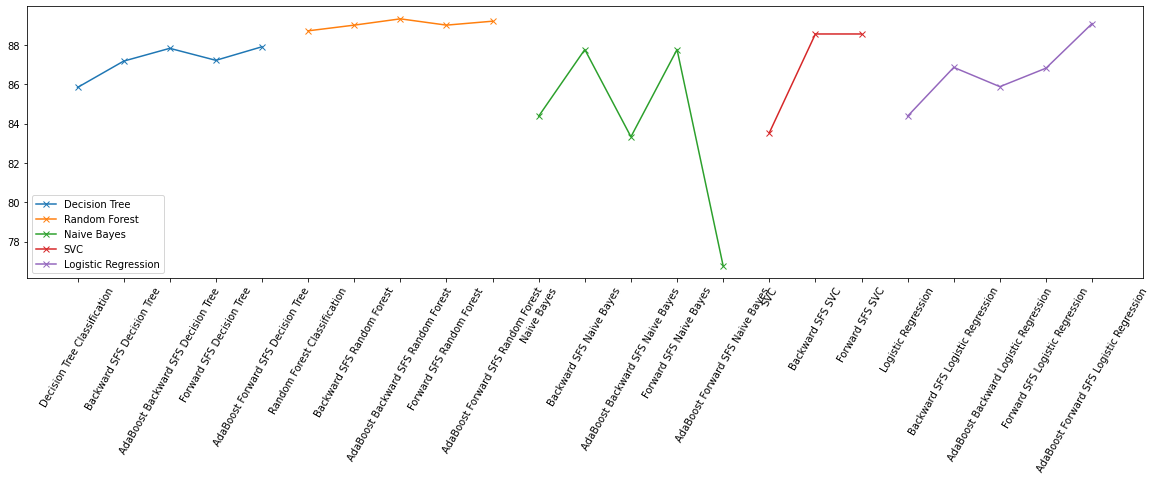

In [ ]:
plt.figure(figsize = (20,5))
dt_accuracies = [85.84, 87.18, 87.83, 87.22, 87.91]
dt_models = ['Decision Tree Classification', 'Backward SFS Decision Tree', 'AdaBoost Backward SFS Decision Tree', 'Forward SFS Decision Tree', 'AdaBoost Forward SFS Decision Tree']
rf_accuracies = [88.72, 89.01, 89.33, 89.01, 89.21]
rf_models = ['Random Forest Classification', 'Backward SFS Random Forest', 'AdaBoost Backward SFS Random Forest', 'Forward SFS Random Forest', 'AdaBoost Forward SFS Random Forest']
nb_accuracies = [84.38, 87.77, 83.33, 87.77, 76.76]
nb_models = ['Naive Bayes', 'Backward SFS Naive Bayes', 'AdaBoost Backward SFS Naive Bayes', 'Forward SFS Naive Bayes', 'AdaBoost Forward SFS Naive Bayes']
svc_accuracies = [83.53, 88.56, 88.56]
svc_models = ['SVC', 'Backward SFS SVC', 'Forward SFS SVC']
lr_accuracies = [84.38, 86.86, 85.88, 86.82, 89.09]
lr_models = ['Logistic Regression', 'Backward SFS Logistic Regression', 'AdaBoost Backward Logistic Regression', 'Forward SFS Logistic Regression', 'AdaBoost Forward SFS Logistic Regression']

plt.plot(dt_models, dt_accuracies, marker = 'x', label ='Decision Tree')
plt.plot(rf_models, rf_accuracies, marker = 'x', label ='Random Forest')
plt.plot(nb_models, nb_accuracies, marker = 'x', label = 'Naive Bayes')
plt.plot(svc_models, svc_accuracies, marker = 'x', label ='SVC')
plt.plot(lr_models, lr_accuracies, marker = 'x', label ='Logistic Regression')

plt.xticks(rotation = 60)
plt.legend()
